In [1]:
#import lib
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import statsmodels.api as sm

In [3]:
#load data
cars=pd.read_csv('Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [7]:
#coreelation and pair plot
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<Axes: >

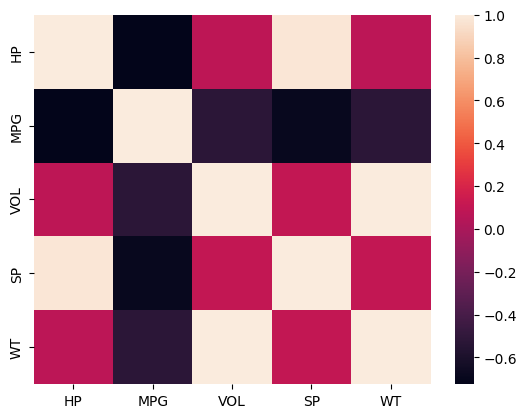

In [8]:
sns.heatmap(cars.corr())

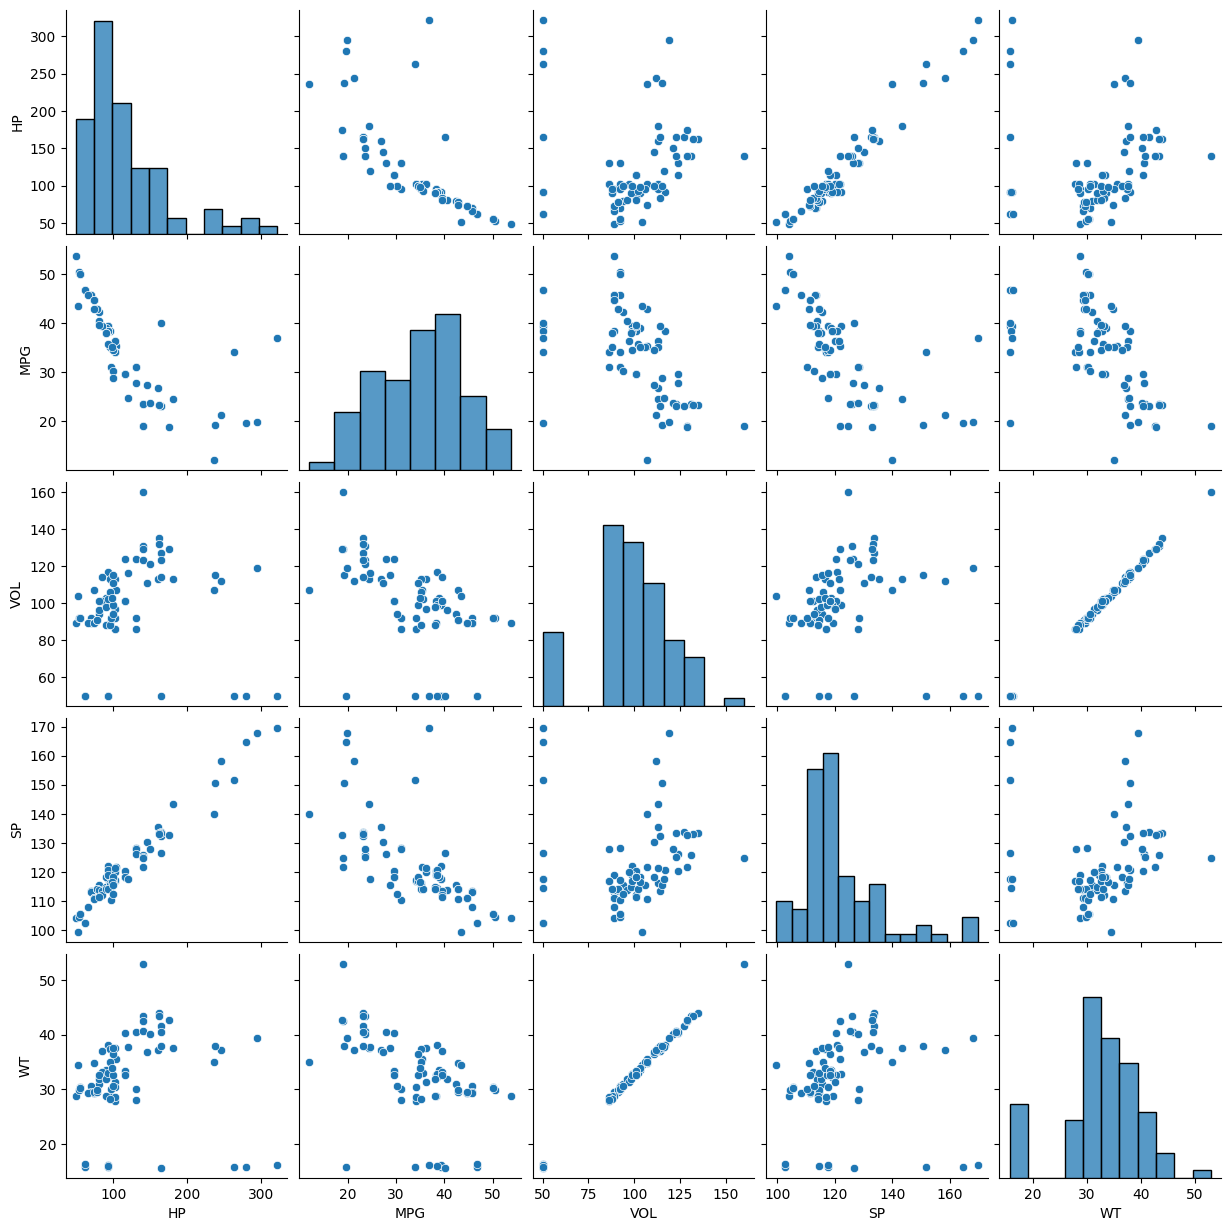

In [9]:
#pairplot
sns.pairplot(cars)

In [11]:
#prepare model
model=smf.ols("MPG~HP+SP+VOL+WT",data=cars).fit()

In [12]:
#slope and intercept
model.params

Intercept    30.677336
HP           -0.205444
SP            0.395627
VOL          -0.336051
WT            0.400574
dtype: float64

In [13]:
#fitted value
model.fittedvalues

0     43.441935
1     42.388793
2     42.279341
3     42.538360
4     42.172648
        ...    
76    21.282096
77    17.899050
78    26.136453
79    12.316612
80    15.559481
Length: 81, dtype: float64

In [14]:
#residula or errors
model.resid

0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Length: 81, dtype: float64

In [15]:
#rsqaured
model.rsquared

0.7705372737359842

In [16]:
model.rsquared_adj

0.7584602881431413

In [18]:
model.pvalues

Intercept    0.042936
HP           0.000001
SP           0.014579
VOL          0.556294
WT           0.813649
dtype: float64

In [24]:
#vif caculate
#vif=(1/1-r)

x1=smf.ols('HP~SP+VOL+WT',data=cars).fit().rsquared
vif1=1/(1-x1)
print(vif1)
x1=smf.ols('SP~HP+VOL+WT',data=cars).fit().rsquared
vif1=1/(1-x1)
print(vif1)
x1=smf.ols('VOL~SP+HP+WT',data=cars).fit().rsquared
vif1=1/(1-x1)
print(vif1)
x1=smf.ols('WT~SP+VOL+HP',data=cars).fit().rsquared
vif1=1/(1-x1)
print(vif1)

19.926588974998563
20.00763878305008
638.8060836592878
639.5338175572624


In [ ]:
#HP~SP+VOL+WT gives best result , least vif 